# Fiji SIR

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

##### Constants definition:

##### DAYS: Number of days the simulation will run for, set to 180 days.
##### PORTS: Number of ports, set to 3.
##### PORT_PARAMS: A list of dictionaries that contains the parameters for each port. Each dictionary defines the population, the ratio of local and foreign agents within that port.

In [2]:
# Constants definition
DAYS = 180
PORTS = 3
PORT_PARAMS = [
    {"population": 3000, "local_ratio": 0.13, "foreign_ratio": 0.87},
    {"population": 100, "local_ratio": 0.23, "foreign_ratio": 0.77},
    {"population": 3000, "local_ratio": 0.23, "foreign_ratio": 0.77}
]

##### General probabilities:

##### PROB_RECOVERY: Probability of an infected individual recovering on any given day, set to 50%.
##### PROB_INFECTION: Probability of a susceptible individual getting infected when in close contact with an infected individual, set to 80%.

In [3]:
# General probabilities
PROB_RECOVERY = 0.50
PROB_INFECTION = 0.8

##### The simulate_port_infection function models the disease spread within a port, considering an initial infection rate of 3% among the foreign agents.
##### It initializes the populations of local and foreign agents based on the port_params
##### The state of each agent is represented using numbers: 0 for susceptible, 1 for infected, and 2 for recovered.
##### The function contains a loop simulating each day:
##### * Agents come into close contact, potentially leading to infections.
##### * Infected agents may recover.
##### * The state of each agent is recorded daily.
##### * At the end of each day, some foreign agents leave the port, and new ones arrive, with 3% of the newcomers being infected.
##### * The function returns daily counts of susceptible, infected, and recovered agents.

In [4]:
# Simulation function for a port with fixed 3% initial infection for foreign agents
def simulate_port_infection(port_params):
    # Population initialization
    num_local = int(port_params["population"] * port_params["local_ratio"])
    num_foreign = int(port_params["population"] * port_params["foreign_ratio"])
    num_initial_infected = int(num_foreign * 0.03)  # 3% of foreign agents
    
    # States: 0 = Susceptible, 1 = Infected, 2 = Recovered
    local_agents = np.zeros(num_local)
    
    # Initializing foreign agents with 3% infected
    foreign_agents = np.zeros(num_foreign)
    infected_indices = np.random.choice(num_foreign, size=num_initial_infected, replace=False)
    foreign_agents[infected_indices] = 1

    # Daily results
    daily_susceptible = []
    daily_infected = []
    daily_recovered = []
    
    for day in range(DAYS):
        # Close contacts (high transmission probability)
        for _ in range(5):
            # Local agents in contact
            local_contacts_indices = np.random.choice(num_local, size=int(0.8*num_local), replace=False)
            infect_local = (local_agents[local_contacts_indices] == 0) & (np.random.rand(len(local_contacts_indices)) < PROB_INFECTION)
            local_agents[local_contacts_indices[infect_local]] = 1

            # Foreign agents in contact
            foreign_contacts_indices = np.random.choice(num_foreign, size=int(0.8*num_foreign), replace=False)
            infect_foreign = (foreign_agents[foreign_contacts_indices] == 0) & (np.random.rand(len(foreign_contacts_indices)) < PROB_INFECTION)
            foreign_agents[foreign_contacts_indices[infect_foreign]] = 1
        
        # Recovery
        recover_local = (local_agents == 1) & (np.random.rand(num_local) < PROB_RECOVERY)
        local_agents[recover_local] = 2

        recover_foreign = (foreign_agents == 1) & (np.random.rand(num_foreign) < PROB_RECOVERY)
        foreign_agents[recover_foreign] = 2
        
        # Register daily results
        daily_susceptible.append((local_agents == 0).sum() + (foreign_agents == 0).sum())
        daily_infected.append((local_agents == 1).sum() + (foreign_agents == 1).sum())
        daily_recovered.append((local_agents == 2).sum() + (foreign_agents == 2).sum())

        # Replace only the foreign agents that leave
        num_new_foreign = int(num_foreign * port_params["foreign_ratio"])  # number of new foreigners arriving
        foreign_agents[:num_new_foreign] = 0  # set the first 'num_new_foreign' agents to susceptible
        infected_indices_new = np.random.choice(num_new_foreign, size=num_initial_infected, replace=False)
        foreign_agents[infected_indices_new] = 1  # infect 3% of the new arrivals
    
    return daily_susceptible, daily_infected, daily_recovered

##### Simulation for each port:

##### An empty list named results is initialized.
##### A loop runs the above simulation function for each set of port parameters, and the results are stored in the results list.

In [5]:
# Simulation for each port
results = []

for port in PORT_PARAMS:
    results.append(simulate_port_infection(port))

##### Plotting function for the results:

##### The plot_results function visualizes the simulation results.
##### It creates a figure with three subplots, one for each port.it plots the number of susceptible, infected, and recovered agents over the 180 days.

In [6]:
# Plotting function for the results
def plot_results(results):
    plt.figure(figsize=(15,15))
    port_names = ["First Port", "Second Port", "Third Port"]

    for idx, (daily_susceptible, daily_infected, daily_recovered) in enumerate(results, start=0):
        plt.subplot(3, 1, idx+1)
        plt.plot(days, daily_susceptible, label="Susceptible", color="blue")
        plt.plot(days, daily_infected, label="Infected", color="red")
        plt.plot(days, daily_recovered, label="Recovered", color="green")
        plt.xlabel("Days")
        plt.ylabel("Number of agents")
        plt.title(f"Disease Evolution in the {port_names[idx]} over 180 days")
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.show()

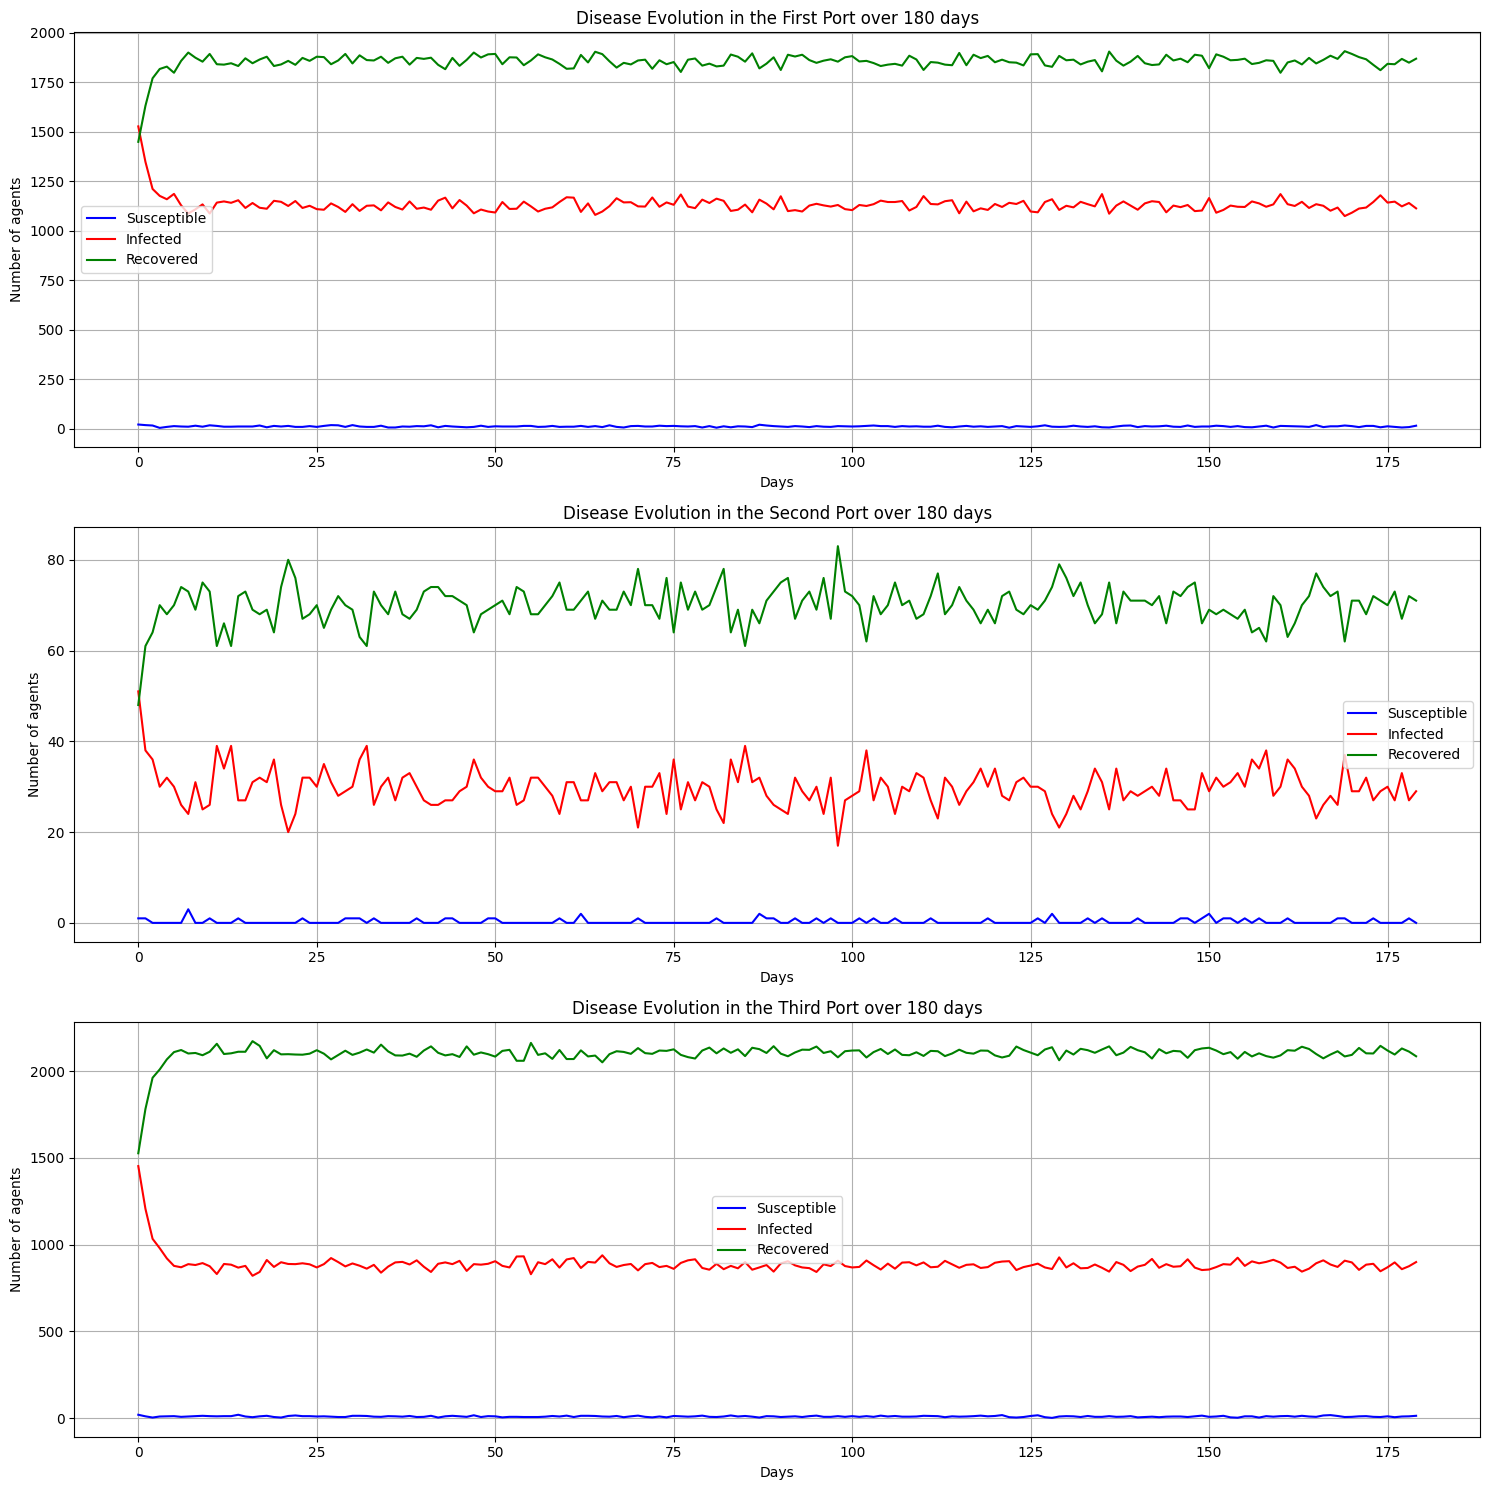

In [7]:
# Plot the results
days = np.arange(DAYS)
plot_results(results)